# Library Decleration

In [38]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as py
import seaborn as sb
import numpy as np


# Reading and Displaying the Data 

In [39]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes",cnx)
df_new=pd.read_sql_query("SELECT * FROM Player_Attributes",cnx)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


# Data Visualisation

In [40]:
df.shape

(183978, 42)

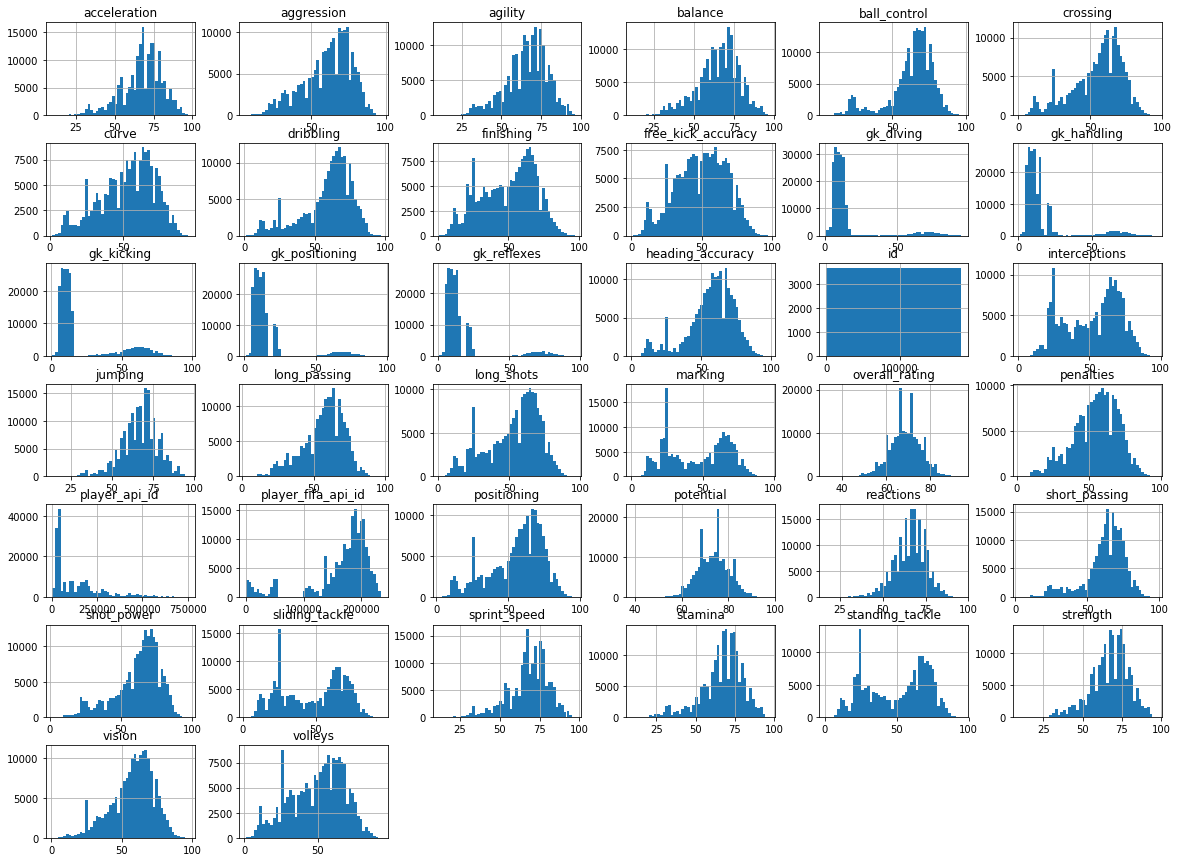

In [41]:
df.hist(bins=50,figsize=(20,15))
py.show()

# Handling Null Values

In [42]:
df.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [43]:
df.dropna(axis=0,inplace=True)

In [44]:
df.isna().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


# Data Cleaning

In [45]:
att=list(df.columns)
for i in att:
    if(df[i].dtype.kind=='O'):
        print(i)

date
preferred_foot
attacking_work_rate
defensive_work_rate


In [46]:
x =df.drop(['overall_rating','id','player_fifa_api_id','player_api_id','date','preferred_foot','attacking_work_rate','defensive_work_rate'],axis=1)
y=df['overall_rating']

# Correlation Detection using Heating Map

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
potential,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
crossing,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
finishing,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
heading_accuracy,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
short_passing,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
volleys,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
dribbling,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
curve,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
free_kick_accuracy,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
long_passing,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


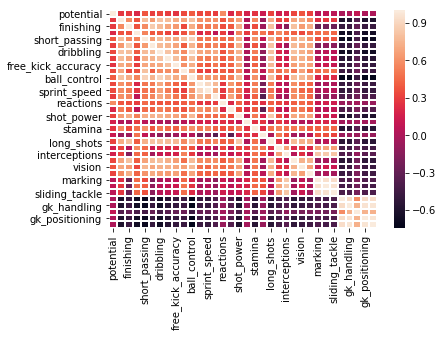

In [47]:
import seaborn as sb
sb.heatmap(x.corr(),linewidths=1,)
x.corr()>0.8

# Train Test Split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

# Implementation of Linear Regression

In [49]:
lm=LinearRegression()
lm.fit(x_train.values,y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Model Evaluation

In [50]:
print("Train Score:",lm.score(x_train,y_train))
print("Test Score:",lm.score(x_test,y_test))

Train Score: 0.841842696669627
Test Score: 0.8413575733613188


In [51]:
from sklearn.metrics import mean_squared_error
import math
train_pred_y=lm.predict(x_train)
test_pred_y=lm.predict(x_test)
print("RMSE Train",math.sqrt(mean_squared_error(y_train,train_pred_y)))
print("RMSE Test",math.sqrt(mean_squared_error(y_test,test_pred_y)))

RMSE Train 2.790012294722905
RMSE Test 2.8106865379863897


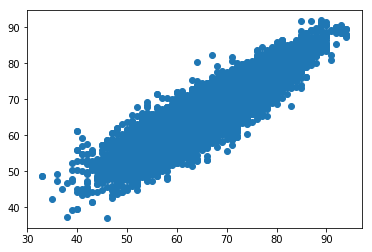

In [52]:
py.scatter(y_test,test_pred_y)
py.show()

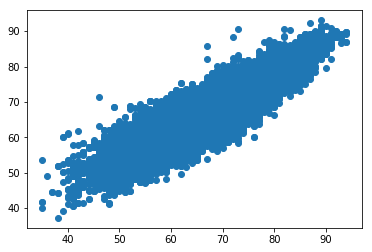

In [53]:
py.scatter(y_train,train_pred_y)
py.show()

In [54]:
import statsmodels.formula.api as smf
rval=smf.ols(formula='overall_rating~potential+crossing+finishing+heading_accuracy+short_passing+volleys+dribbling+curve+free_kick_accuracy+long_passing+ball_control+acceleration+sprint_speed+agility+reactions+balance+shot_power+jumping+stamina+strength+long_shots+aggression+interceptions+positioning+vision+penalties+marking+standing_tackle+sliding_tackle+gk_diving+gk_handling+gk_kicking+gk_positioning+gk_reflexes',data=df).fit()
rval.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 2.820e+04
Date:                Fri, 07 Sep 2018   Prob (F-statistic):               0.00
Time:                        10:56:23   Log-Likelihood:            -4.4136e+05
No. Observations:              180354   AIC:                         8.828e+05
Df Residuals:                  180319   BIC:                         8.831e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.6097      0.094    -38.285      0.000      -3.795      -3.425
potential              0.3779      0.001    257.813      0.000       0.375       0.381
crossing               0.0222      0.001     26.476      0.000       0.021       0.024
finishing              0.0117      0.001     12.651      0.000       0.010       0.014
heading_accuracy       0.0698      0.001     84.979      0.000       0.068       0.071
short_passing          0.0501      0.001     36.184      0.000       0.047       0.053
volleys                0.0043      0.001      5.151      0.000       0.003       0.006
dribbling             -0.0130      0.001    -11.157      0.000      -0.015      -0.011
curve                  0.0117      0.001     14.531      0.000       0.010       0.013
free_kick_accuracy     0.0126      0.001     17.633      0.000       0.011       0.014
long_passing           0.0073      0.001      7.648      0.000       0.005       0.009
ball_control           0.1349      0.002     84.652      0.000       0.132       0.138
acceleration           0.0067      0.001      4.806      0.000       0.004       0.009
sprint_speed           0.0089      0.001      6.777      0.000       0.006       0.011
agility               -0.0086      0.001     -8.466      0.000      -0.011      -0.007
reactions              0.2103      0.001    193.160      0.000       0.208       0.212
balance                0.0082      0.001     10.424      0.000       0.007       0.010
shot_power             0.0168      0.001     19.043      0.000       0.015       0.019
jumping                0.0157      0.001     21.505      0.000       0.014       0.017
stamina               -0.0052      0.001     -6.361      0.000      -0.007      -0.004
strength               0.0614      0.001     72.918      0.000       0.060       0.063
long_shots            -0.0135      0.001    -14.691      0.000      -0.015      -0.012
aggression             0.0201      0.001     29.179      0.000       0.019       0.021
interceptions          0.0126      0.001     17.049      0.000       0.011       0.014
positioning           -0.0107      0.001    -13.478      0.000      -0.012      -0.009
vision                -0.0020      0.001     -2.324      0.020      -0.004      -0.000
penalties              0.0143      0.001     19.061      0.000       0.013       0.016
marking                0.0325      0.001     28.820      0.000       0.030       0.035
standing_tackle        0.0032      0.001      2.424      0.015       0.001       0.006
sliding_tackle        -0.0286      0.001    -25.856      0.000      -0.031      -0.026
gk_diving              0.1631      0.001    110.924      0.000       0.160       0.166
gk_handling            0.0335      0.002     17.383      0.000       0.030       0.037
gk_kicking            -0.0340      0.0

# Error Distribution

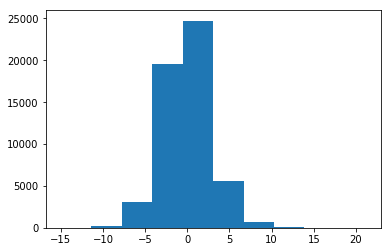

In [55]:
py.hist(test_pred_y-y_test,bins=10)
py.show()

# Model devloped by including categorical values(one hot encoding) and removal of column with higher correlation(>95%)

In [56]:
cnx = sqlite3.connect('database.sqlite')
df1 = pd.read_sql_query("SELECT * FROM Player_Attributes",cnx)
df1.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [57]:
df1.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [58]:
df1.dropna(axis=0,inplace=True)

In [59]:
df1.isna().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


# One Hot Encoding for preferred_foot column

In [60]:
df_dum=pd.get_dummies(df1.preferred_foot,drop_first=True, prefix='foot')


In [61]:
df1 = df1.drop('preferred_foot', axis=1).join(df_dum)

# Replacing Categorical Data with Numerical Data

In [62]:
df1['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [63]:
df1['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
o           1328
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

In [64]:
df1['attacking_work_rate'] = df1['attacking_work_rate'].map({'high': 3, 'medium': 2,'low':1,'norm':2,'y':2,'stoc':2,'le':2,'None':2})
df1['defensive_work_rate'] = df1['defensive_work_rate'].map({'high': 3, 'medium': 2,'low':1,'o':1,'1':1,'2':1,'ormal':2,'3':2,'5':2,'7':3,'6':3,'9':3,'0':1,'4':2,'8':3,'es':2,'tocky':2,'ean':2})

In [65]:
df1.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,foot_right
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,2,2,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,2,2,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,2,2,49.0,44.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,2,2,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,2,2,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1


# Dropping Columns with Correlation more than 95%

In [66]:
corr_matrix = df1.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)
df1.drop(to_drop,axis=1,inplace=True)

['standing_tackle', 'sliding_tackle', 'gk_positioning', 'gk_reflexes']


# Checking the columns with non-numerical Data

In [67]:
att=list(df1.columns)
for i in att:
    if(df1[i].dtype.kind=='O'):
        print(i)

date


# Checking relationship between features and labels

In [68]:
import statsmodels.formula.api as smf
rval=smf.ols(formula='overall_rating~potential+attacking_work_rate+defensive_work_rate+crossing+finishing+heading_accuracy+short_passing+volleys+dribbling+curve+free_kick_accuracy+long_passing+ball_control+acceleration+sprint_speed+agility+reactions+balance+shot_power+jumping+stamina+strength+long_shots+aggression+interceptions+positioning+vision+penalties+marking+gk_diving+gk_handling+gk_kicking+foot_right',data=df1).fit()
rval.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 2.869e+04
Date:                Fri, 07 Sep 2018   Prob (F-statistic):               0.00
Time:                        10:56:44   Log-Likelihood:            -4.4231e+05
No. Observations:              180354   AIC:                         8.847e+05
Df Residuals:                  180320   BIC:                         8.850e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.9460      0.099    -29.827      0.000      -3.140      -2.752
potential               0.3811      0.001    259.390      0.000       0.378       0.384
attacking_work_rate    -0.2470      0.015    -16.671      0.000      -0.276      -0.218
defensive_work_rate    -0.0982      0.014     -6.883      0.000      -0.126      -0.070
crossing                0.0216      0.001     25.439      0.000       0.020       0.023
finishing               0.0158      0.001     17.156      0.000       0.014       0.018
heading_accuracy        0.0674      0.001     81.891      0.000       0.066       0.069
short_passing           0.0455      0.001     32.736      0.000       0.043       0.048
volleys                 0.0035      0.001      4.181      0.000       0.002       0.005
dribbling              -0.0114      0.001     -9.695      0.000      -0.014      -0.009
curve                   0.0105      0.001     13.003      0.000       0.009       0.012
free_kick_accuracy      0.0117      0.001     16.255      0.000       0.010       0.013
long_passing            0.0065      0.001      6.811      0.000       0.005       0.008
ball_control            0.1312      0.002     81.971      0.000       0.128       0.134
acceleration            0.0076      0.001      5.461      0.000       0.005       0.010
sprint_speed            0.0069      0.001      5.232      0.000       0.004       0.010
agility                -0.0071      0.001     -6.950      0.000      -0.009      -0.005
reactions               0.2144      0.001    196.764      0.000       0.212       0.217
balance                 0.0068      0.001      8.589      0.000       0.005       0.008
shot_power              0.0175      0.001     19.715      0.000       0.016       0.019
jumping                 0.0156      0.001     21.290      0.000       0.014       0.017
stamina                -0.0038      0.001     -4.544      0.000      -0.005      -0.002
strength                0.0613      0.001     72.419      0.000       0.060       0.063
long_shots             -0.0138      0.001    -14.906      0.000      -0.016      -0.012
aggression              0.0187      0.001     27.084      0.000       0.017       0.020
interceptions           0.0099      0.001     13.586      0.000       0.008       0.011
positioning            -0.0105      0.001    -13.096      0.000      -0.012      -0.009
vision                 -0.0014      0.001     -1.639      0.101      -0.003       0.000
penalties               0.0150      0.001     19.783      0.000       0.013       0.016
marking                 0.0131      0.001     17.949      0.000       0.012       0.015
gk_diving               0.1901      0.001    147.440      0.000       0.188       0.193
gk_handling             0.0750      0.002     46.955      0.000       0.072       0.078
gk_

# Dropping unwanted columns and columns with low relationship with labels(vision and foot_right)

In [69]:
x=df1.drop(['overall_rating','id','player_fifa_api_id','player_api_id','date','vision','foot_right'],axis=1)
y=df1['overall_rating']

# Correlation Visualisation Using heatmap

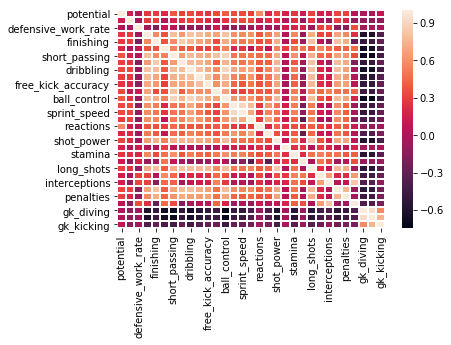

In [70]:
import seaborn as sb
sb.heatmap(x.corr(),linewidths=1,)

# Train Test Split

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

# Implementing Linear Regression

In [72]:
lr=LinearRegression()
lr.fit(x_train.values,y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Score for Test and Train Data

In [73]:
print('Train Score:',lr.score(x_train,y_train))
print('Test Score:',lr.score(x_test,y_test))

Train Score: 0.840156597296922
Test Score: 0.839681407448116


# RMSE Value 

In [74]:
from sklearn.metrics import mean_squared_error as rms
import math
train_pred_y=lr.predict(x_train)
test_pred_y=lr.predict(x_test)
print("RMSE Train:",math.sqrt(rms(y_train,train_pred_y)))
print("RMSE Test:",math.sqrt(rms(y_test,test_pred_y)))

RMSE Train: 2.804844889922694
RMSE Test: 2.825495937256368


# Graphical Represention of Actual Vs Predicted Data

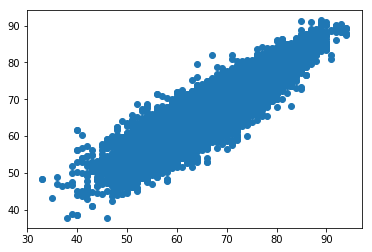

In [75]:
py.scatter(y_test,test_pred_y)
py.show()

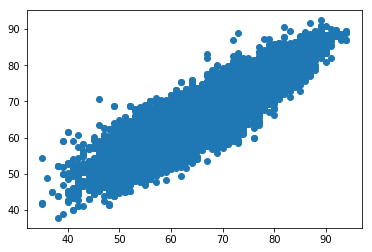

In [76]:
py.scatter(y_train,train_pred_y)
py.show()

# Error distribution

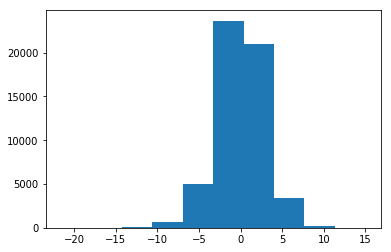

In [77]:
py.hist(y_test-test_pred_y,bins=10)
py.show()


# Summary of the Model

In [78]:
import statsmodels.formula.api as smf
rval=smf.ols(formula='overall_rating~potential+attacking_work_rate+defensive_work_rate+crossing+finishing+heading_accuracy+short_passing+volleys+dribbling+curve+free_kick_accuracy+long_passing+ball_control+acceleration+sprint_speed+agility+reactions+balance+shot_power+jumping+stamina+strength+long_shots+aggression+interceptions+positioning+penalties+marking+gk_diving+gk_handling+gk_kicking',data=df1).fit()
rval.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 3.054e+04
Date:                Fri, 07 Sep 2018   Prob (F-statistic):               0.00
Time:                        10:56:57   Log-Likelihood:            -4.4231e+05
No. Observations:              180354   AIC:                         8.847e+05
Df Residuals:                  180322   BIC:                         8.850e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.9343      0.098    -29.932      0.000      -3.126      -2.742
potential               0.3810      0.001    259.604      0.000       0.378       0.384
attacking_work_rate    -0.2466      0.015    -16.650      0.000      -0.276      -0.218
defensive_work_rate    -0.0983      0.014     -6.894      0.000      -0.126      -0.070
crossing                0.0216      0.001     25.616      0.000       0.020       0.023
finishing               0.0157      0.001     17.142      0.000       0.014       0.018
heading_accuracy        0.0675      0.001     82.277      0.000       0.066       0.069
short_passing           0.0452      0.001     32.927      0.000       0.042       0.048
volleys                 0.0034      0.001      4.104      0.000       0.002       0.005
dribbling              -0.0114      0.001     -9.671      0.000      -0.014      -0.009
curve                   0.0104      0.001     12.911      0.000       0.009       0.012
free_kick_accuracy      0.0116      0.001     16.179      0.000       0.010       0.013
long_passing            0.0062      0.001      6.638      0.000       0.004       0.008
ball_control            0.1310      0.002     82.108      0.000       0.128       0.134
acceleration            0.0077      0.001      5.565      0.000       0.005       0.010
sprint_speed            0.0070      0.001      5.322      0.000       0.004       0.010
agility                -0.0072      0.001     -7.079      0.000      -0.009      -0.005
reactions               0.2143      0.001    196.994      0.000       0.212       0.216
balance                 0.0066      0.001      8.468      0.000       0.005       0.008
shot_power              0.0175      0.001     19.827      0.000       0.016       0.019
jumping                 0.0157      0.001     21.416      0.000       0.014       0.017
stamina                -0.0039      0.001     -4.694      0.000      -0.005      -0.002
strength                0.0613      0.001     72.422      0.000       0.060       0.063
long_shots             -0.0138      0.001    -14.951      0.000      -0.016      -0.012
aggression              0.0187      0.001     27.058      0.000       0.017       0.020
interceptions           0.0098      0.001     13.515      0.000       0.008       0.011
positioning            -0.0107      0.001    -13.570      0.000      -0.012      -0.009
penalties               0.0149      0.001     19.740      0.000       0.013       0.016
marking                 0.0132      0.001     18.148      0.000       0.012       0.015
gk_diving               0.1902      0.001    147.773      0.000       0.188       0.193
gk_handling             0.0749      0.002     46.937      0.000       0.072       0.078
gk_kicking             -0.0253      0.001    -44.462      0.000      -0.026      -0.024
===